In [26]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [27]:
BASE_DIR = "./data/word_nglegena_20260102_155715"

CSV_PATH = f"{BASE_DIR}/label_aug.csv"

TRAIN_CSV_PATH = f"{BASE_DIR}/train_aug.csv"
VAL_CSV_PATH = f"{BASE_DIR}/val_aug.csv"
TEST_CSV_PATH = f"{BASE_DIR}/test_aug.csv"


TRAIN_RATIO = 0.7
VAL_RATIO   = 0.15
TEST_RATIO  = 0.15
assert TRAIN_RATIO + VAL_RATIO + TEST_RATIO == 1.0

RANDOM_STATE = 42


In [28]:
def extract_group_id(filename):
    # img_00043_orig.png  -> img_00043
    # img_00043_aug1.png  -> img_00043
    return re.sub(r'_(orig|aug\d+)\.png$', '', filename)



df = pd.read_csv(CSV_PATH)

print("Total rows:", len(df))
df.head()

df["group_id"] = df["image"].apply(extract_group_id)
df[["image", "group_id"]].head()


Total rows: 2871


,image,group_id
0,img_00043_orig.png,img_00043
1,img_00043_aug1.png,img_00043
2,img_00043_aug2.png,img_00043
3,img_00044_orig.png,img_00044
4,img_00044_aug1.png,img_00044


In [29]:
df.groupby("group_id").size().value_counts()

group_df = (
    df
    .drop_duplicates(subset="group_id")
    .reset_index(drop=True)
)



print("Total unique groups:", len(group_df))
group_df.head()


Total unique groups: 957


,image,transcription,transliteration,length,font_used,group_id
0,img_00043_orig.png,ꦝꦢꦛꦤ,dhadathana,4,Noto Sans Javanese Regular,img_00043
1,img_00044_orig.png,ꦤꦗꦲꦱ,najahasa,4,Jamawi,img_00044
2,img_00045_orig.png,ꦚꦭꦤꦩꦪ,nyalanamaya,5,Noto Sans Javanese Regular,img_00045
3,img_00046_orig.png,ꦭꦮ,lawa,2,Nyk Ngayogyan Jejeg,img_00046
4,img_00047_orig.png,ꦛꦒꦢꦢꦩꦠ,thagadadamata,6,Djoharuddin,img_00047


In [30]:
train_groups, temp_groups = train_test_split(
    group_df,
    test_size=1 - TRAIN_RATIO,
    random_state=RANDOM_STATE,
    stratify=group_df["font_used"]
)

val_groups, test_groups = train_test_split(
    temp_groups,
    test_size=TEST_RATIO / (VAL_RATIO + TEST_RATIO),
    random_state=RANDOM_STATE,
    stratify=temp_groups["font_used"]
)



print("Train groups:", len(train_groups))
print("Val groups :", len(val_groups))
print("Test groups:", len(test_groups))


Train groups: 669
Val groups : 144
Test groups: 144


In [31]:
train_df = df[df["group_id"].isin(train_groups["group_id"])].reset_index(drop=True)
val_df   = df[df["group_id"].isin(val_groups["group_id"])].reset_index(drop=True)
test_df  = df[df["group_id"].isin(test_groups["group_id"])].reset_index(drop=True)



print("Train rows:", len(train_df))
print("Val rows  :", len(val_df))
print("Test rows :", len(test_df))

Train rows: 2007
Val rows  : 432
Test rows : 432


No Group leakage: True


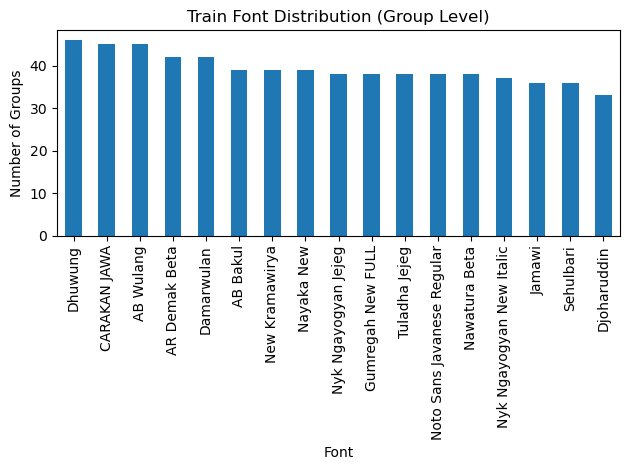

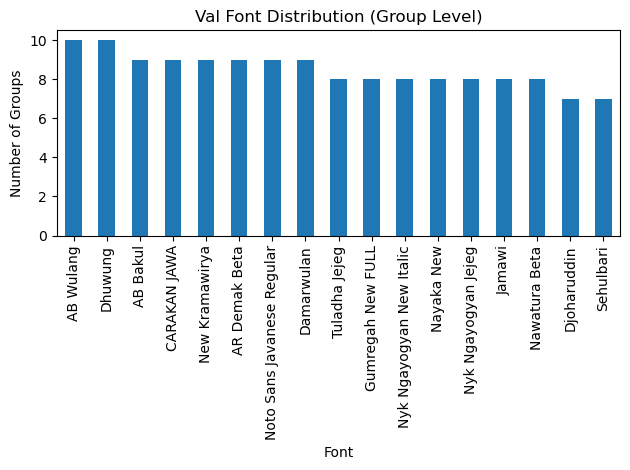

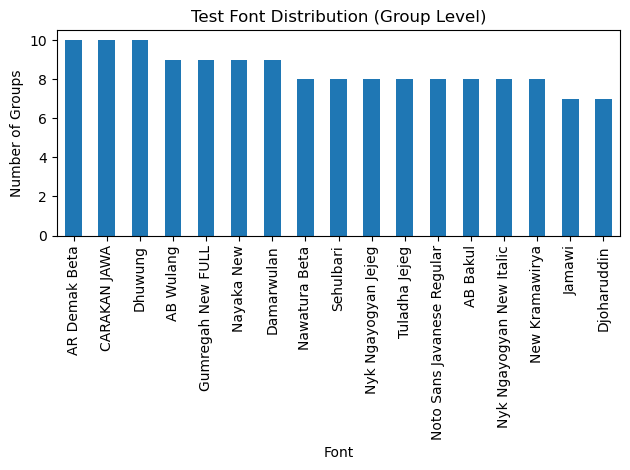

In [32]:
train_val_leak  = set(train_df["group_id"]).isdisjoint(set(val_df["group_id"]))
train_test_leak = set(train_df["group_id"]).isdisjoint(set(test_df["group_id"]))
val_test_leak   = set(val_df["group_id"]).isdisjoint(set(test_df["group_id"]))

print("No Group leakage:", train_val_leak and train_test_leak and val_test_leak)



train_groups["font_used"].value_counts().plot(kind="bar")
plt.title("Train Font Distribution (Group Level)")
plt.xlabel("Font")
plt.ylabel("Number of Groups")
plt.tight_layout()
plt.show()

val_groups["font_used"].value_counts().plot(kind="bar")
plt.title("Val Font Distribution (Group Level)")
plt.xlabel("Font")
plt.ylabel("Number of Groups")
plt.tight_layout()
plt.show()

test_groups["font_used"].value_counts().plot(kind="bar")
plt.title("Test Font Distribution (Group Level)")
plt.xlabel("Font")
plt.ylabel("Number of Groups")
plt.tight_layout()
plt.show()


In [33]:
train_df.to_csv(TRAIN_CSV_PATH, index=False)
val_df.to_csv(VAL_CSV_PATH, index=False)
test_df.to_csv(TEST_CSV_PATH, index=False)

print("Saved Train CSV: ", TRAIN_CSV_PATH)
print("Saved Val CSV: ", VAL_CSV_PATH)
print("Saved Test CSV: ", TEST_CSV_PATH)


Saved Train CSV:  ./data/word_nglegena_20260102_155715/train_aug.csv
Saved Val CSV:  ./data/word_nglegena_20260102_155715/val_aug.csv
Saved Test CSV:  ./data/word_nglegena_20260102_155715/test_aug.csv
